
# Sahil Sheikh
## CWID: A20518693
## Subject:CS 577
## Semester: FALL 22
## ASSIGNMENT 3

In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe

## Creating two functions to load the two data sets 
clean data if necessary: data is already clean(no missing values) and vectorized so there's no need to perform any operation 

In [2]:
def load_cl_data():
    dataset_1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None)
    # For dataset 1 I will drop the first column, the M/F as we don't need it 
    data_1 = dataset_1
    data1 = data_1.drop(data_1.columns[[0]],axis=1) 
    label_d1 = data1.iloc[:,7:]
    data_d1 = data1.iloc[:,:7]
    #normalize if by subtracting mean and dividing by standard devidation 
    mean_d1 = data_d1.mean(axis=0)
    data_d1 -= mean_d1
    std_d1 = data_d1.std()
    data_d1 /= std_d1
    # one hot encoding
    label_d1 = to_categorical(label_d1)
    # splitiing dataset1 into train, validation and test: DATASET1
    X_d1,test_d1,Y_d1,tar_d1 = train_test_split(data_d1,label_d1,test_size=0.1, random_state=69)
    train_x,vali_x,train_y,vali_y= train_test_split(X_d1,Y_d1,test_size=0.2, random_state=69)
    
    return train_x,train_y,vali_x,vali_y,test_d1,tar_d1

In [3]:
def load_rg_data():
    dataset_2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data", header=None)
    # For dataset 2 I will drop the first two columns as they are non predictive  
    data_2 = dataset_2
    data2 = data_2.drop(data_2.columns[[0,1]],axis=1)
    data_d2 = data2.iloc[:,:7]
    label_d2 = data2.iloc[:,7:]
    #for 2nd dataset
    mean_d2 = data_d2.mean(axis=0)
    data_d2 -= mean_d2
    std_d2 = data_d2.std()
    data_d2 /= std_d2  
    # splitiing dataset1 into train, validation and test: DATASET2    
    X_d2,test_d2,Y_d2,tar_d2 = train_test_split(data_d2,label_d2,test_size=0.08)
    train_d2,vali_d2,train_d2_lab,vali_d2_lab= train_test_split(X_d2,Y_d2,test_size=0.08)
    
    return train_d2,train_d2_lab,vali_d2,vali_d2_lab,test_d2,tar_d2

In [4]:
train_x,train_y,vali_x,vali_y,test_d1,tar_d1 = load_cl_data()
print(train_x.shape)
print(train_y.shape)
print(vali_x.shape)
print(vali_y.shape)
print(test_d1.shape)
print(tar_d1.shape)

(3007, 7)
(3007, 30)
(752, 7)
(752, 30)
(418, 7)
(418, 30)


In [5]:
train_d2,train_d2_lab,vali_d2,vali_d2_lab,test_d2,tar_d2 = load_rg_data()
print(train_d2.shape)
print(train_d2_lab.shape)
print(vali_d2.shape)
print(vali_d2_lab.shape)
print(test_d2.shape)
print(tar_d2.shape)

(176, 7)
(176, 1)
(16, 7)
(16, 1)
(17, 7)
(17, 1)


loss function, optimizers need 2 for each dataset & report performance

for regression we use 
 - loss func : mse, huber
 - optimizer : adam, sgd

for classification we use:
 - if categooricial : categorical cross entropy, KL
 - optimizer : adam, sgd 


# Implementing parameter search on different models

## Model for MSE for regression

In [6]:
def rg_model_mse(train_d2,train_d2_lab,vali_d2,vali_d2_lab,test_d2,tar_d2):
    model = tf.keras.Sequential([
        keras.layers.Dense(8,activation='relu', input_dim=7),
        keras.layers.Dense(14,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(32,activation='relu'),        
        keras.layers.Dense(1,activation='linear')
    ])
    model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer={{choice(['adam','sgd'])}},metrics=['mse'])
    history = model.fit(train_d2,train_d2_lab, epochs={{choice([5,10])}}, validation_data=[vali_d2,vali_d2_lab], batch_size={{choice([5,10,15])}}, verbose=1)
# plot graph of train and val loss vs epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show() 
#get the lowest validation loss of the training epochs
    validation_loss = np.amin(history.history['val_loss']) 

    return {'loss': validation_loss, 'status': STATUS_OK, 'model': model}   


>>> Imports:
#coding=utf-8

try:
    import os
except:
    pass

try:
    import random
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import keras
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.regularizers import l2
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'optimizer': hp.choice('optimizer', ['adam','sgd']),
        'epochs': hp.choice('epochs', [5,10]),
        'batch_size': hp.

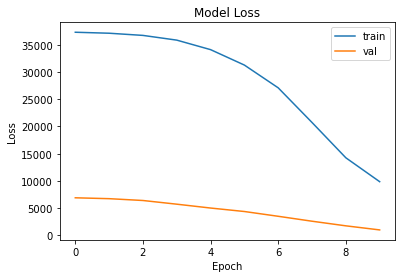

Epoch 1/5                                                                      

18/18 [==============================] - 1s 9ms/step - loss: 37256.5039 - mse: 37256.5039 - val_loss: 6932.6230 - val_mse: 6932.6230

Epoch 2/5                                                                      

18/18 [==============================] - 0s 3ms/step - loss: 37137.4180 - mse: 37137.4180 - val_loss: 6878.2725 - val_mse: 6878.2725

Epoch 3/5                                                                      

18/18 [==============================] - 0s 3ms/step - loss: 36914.1445 - mse: 36914.1445 - val_loss: 6780.5830 - val_mse: 6780.5830

Epoch 4/5                                                                      

18/18 [==============================] - 0s 3ms/step - loss: 36458.1641 - mse: 36458.1641 - val_loss: 6588.5952 - val_mse: 6588.5952

Epoch 5/5                                                                      

18/18 [==============================] - 0s 3ms/step - loss

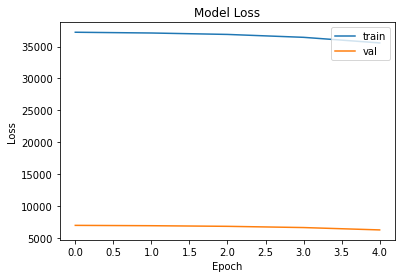

Epoch 1/5                                                                      

12/12 [==============================] - 0s 12ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 2/5                                                                      

12/12 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 3/5                                                                      

12/12 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 4/5                                                                      

12/12 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 5/5                                                                      

12/12 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

 40%|████      | 2/5 [00:06<00:08,  2.78s/trial, best 

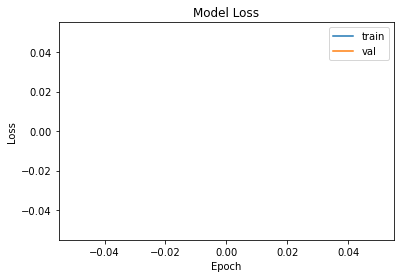

Epoch 1/10                                                                     

18/18 [==============================] - 0s 10ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 2/10                                                                     

18/18 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 3/10                                                                     

18/18 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 4/10                                                                     

18/18 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 5/10                                                                     

18/18 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 6/10                                            

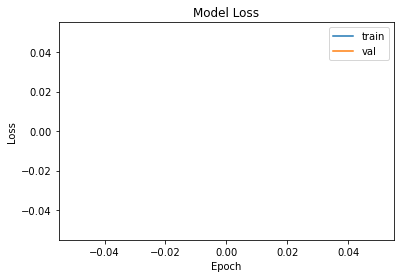

Epoch 1/5                                                                      

12/12 [==============================] - 0s 15ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 2/5                                                                      

12/12 [==============================] - 0s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 3/5                                                                      

12/12 [==============================] - 0s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 4/5                                                                      

12/12 [==============================] - 0s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

Epoch 5/5                                                                      

12/12 [==============================] - 0s 5ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan

 80%|████████  | 4/5 [00:08<00:01,  1.57s/trial, best 

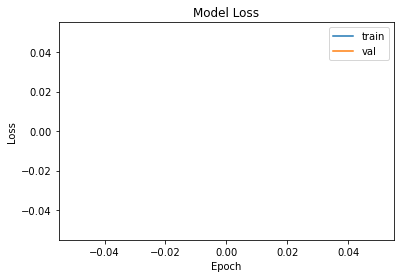

100%|██████████| 5/5 [00:09<00:00,  1.80s/trial, best loss: 1016.6553344726562]


In [7]:
best_run, best_model = optim.minimize(model=rg_model_mse,
                                        data=load_rg_data,
                                        algo=tpe.suggest,max_evals=5,
                                        trials=Trials(),
                                        notebook_name='Code_hw3')

In [8]:
print("Evalutation of best performing model:")
print(best_model.evaluate(test_d2,tar_d2))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
1/1 [==============================] - 0s 16ms/step - loss: 1341.4757 - mse: 1341.4757
[1341.4757080078125, 1341.4757080078125]
Best performing model chosen hyper-parameters:
{'batch_size': 0, 'epochs': 1, 'optimizer': 0}


## Model for huber for regression

In [9]:
def rg_model_hub(train_d2,train_d2_lab,vali_d2,vali_d2_lab,test_d2,tar_d2):
    model = tf.keras.Sequential([
        keras.layers.Dense(8,activation='relu', input_dim=7),
        keras.layers.Dense(14,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(32,activation='relu'),        
        keras.layers.Dense(1,activation='linear')
    ])
    model.compile(loss=tf.keras.losses.Huber(),optimizer={{choice(['adam','sgd','rmsprop'])}},metrics=['mse'])
    
    history = model.fit(train_d2,train_d2_lab, epochs={{choice([5,6,7,8,10])}}, validation_data=[vali_d2,vali_d2_lab], batch_size={{choice([10,12,14,15])}}, verbose=1)
    
# plot graph of train and val loss vs epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show() 
#get the lowest validation loss of the training epochs
    validation_loss = np.amin(history.history['val_loss']) 

    return {'loss': validation_loss, 'status': STATUS_OK, 'model': model}

>>> Imports:
#coding=utf-8

try:
    import os
except:
    pass

try:
    import random
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import keras
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.regularizers import l2
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'optimizer': hp.choice('optimizer', ['adam','sgd','rmsprop']),
        'epochs': hp.choice('epochs', [5,6,7,8,10]),
        '

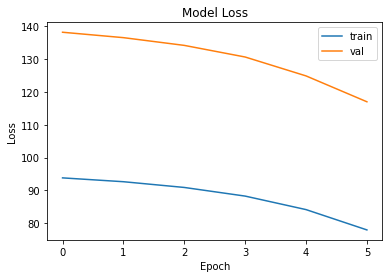

Epoch 1/6                                                                       

18/18 [==============================] - 1s 11ms/step - loss: 94.0530 - mse: 31297.4297 - val_loss: 138.5984 - val_mse: 70577.7578

Epoch 2/6                                                                       

18/18 [==============================] - 0s 4ms/step - loss: 93.4344 - mse: 31098.1367 - val_loss: 137.6836 - val_mse: 70052.1797

Epoch 3/6                                                                       

18/18 [==============================] - 0s 4ms/step - loss: 92.2866 - mse: 30778.7305 - val_loss: 135.8476 - val_mse: 69049.5469

Epoch 4/6                                                                       

18/18 [==============================] - 0s 4ms/step - loss: 89.9196 - mse: 30062.2734 - val_loss: 131.9973 - val_mse: 67070.8750

Epoch 5/6                                                                       

18/18 [==============================] - 0s 4ms/step - loss: 84.7

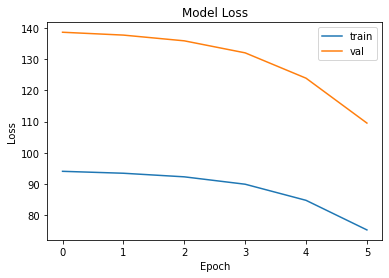

Epoch 1/7                                                                       

13/13 [==============================] - 0s 15ms/step - loss: 93.7244 - mse: 31132.3359 - val_loss: 138.0881 - val_mse: 70153.2188

Epoch 2/7                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 92.9108 - mse: 30874.2676 - val_loss: 136.7169 - val_mse: 69297.8281

Epoch 3/7                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 90.8122 - mse: 30219.2637 - val_loss: 131.7643 - val_mse: 66155.9062

Epoch 4/7                                                                       

13/13 [==============================] - 0s 4ms/step - loss: 75.8244 - mse: 24379.7188 - val_loss: 60.2858 - val_mse: 19311.6543

Epoch 5/7                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 32.29

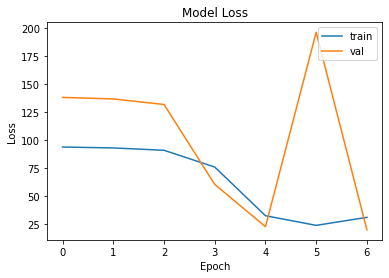

Epoch 1/6                                                                       

13/13 [==============================] - 0s 15ms/step - loss: 94.2008 - mse: 31418.3242 - val_loss: 138.9687 - val_mse: 70905.2188

Epoch 2/6                                                                       

13/13 [==============================] - 0s 4ms/step - loss: 93.9425 - mse: 31332.2383 - val_loss: 138.7013 - val_mse: 70777.7422

Epoch 3/6                                                                       

13/13 [==============================] - 0s 4ms/step - loss: 93.6818 - mse: 31262.4453 - val_loss: 138.4106 - val_mse: 70648.9688

Epoch 4/6                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 93.3813 - mse: 31173.9316 - val_loss: 138.0516 - val_mse: 70490.4219

Epoch 5/6                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 92.9

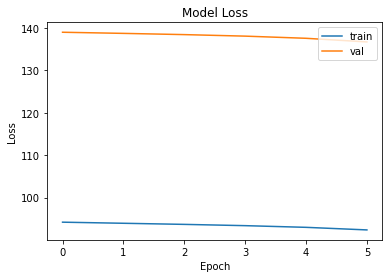

Epoch 1/8                                                                       

13/13 [==============================] - 1s 15ms/step - loss: 94.0841 - mse: 31306.2207 - val_loss: 138.8187 - val_mse: 70685.9453

Epoch 2/8                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 93.7550 - mse: 31224.7617 - val_loss: 138.4429 - val_mse: 70515.5938

Epoch 3/8                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 93.2668 - mse: 31110.6992 - val_loss: 137.8292 - val_mse: 70249.8125

Epoch 4/8                                                                       

13/13 [==============================] - 0s 4ms/step - loss: 92.4436 - mse: 30902.3926 - val_loss: 136.7405 - val_mse: 69752.8984

Epoch 5/8                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 90.9

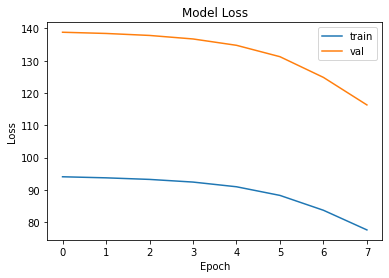

Epoch 1/7                                                                       

13/13 [==============================] - 1s 16ms/step - loss: 93.8572 - mse: 31264.3262 - val_loss: 138.6067 - val_mse: 70650.9297

Epoch 2/7                                                                       

13/13 [==============================] - 0s 6ms/step - loss: 93.3884 - mse: 31124.3105 - val_loss: 138.1165 - val_mse: 70424.5234

Epoch 3/7                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 92.7250 - mse: 30919.0020 - val_loss: 137.3510 - val_mse: 70082.0000

Epoch 4/7                                                                       

13/13 [==============================] - 0s 6ms/step - loss: 91.6834 - mse: 30562.6074 - val_loss: 136.0986 - val_mse: 69459.4609

Epoch 5/7                                                                       

13/13 [==============================] - 0s 6ms/step - loss: 90.0

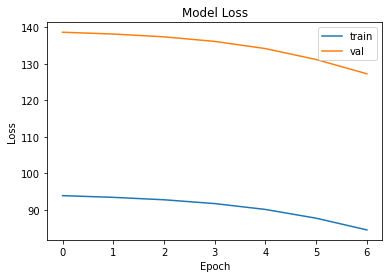

Epoch 1/5                                                                       

13/13 [==============================] - 1s 14ms/step - loss: 93.7498 - mse: 31179.1855 - val_loss: 138.2920 - val_mse: 70097.6094

Epoch 2/5                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 93.1210 - mse: 30939.9707 - val_loss: 137.5465 - val_mse: 69516.3594

Epoch 3/5                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 92.1560 - mse: 30631.4883 - val_loss: 136.2426 - val_mse: 68545.2578

Epoch 4/5                                                                       

13/13 [==============================] - 0s 4ms/step - loss: 90.4885 - mse: 30207.3457 - val_loss: 133.9459 - val_mse: 66941.7031

Epoch 5/5                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 87.4

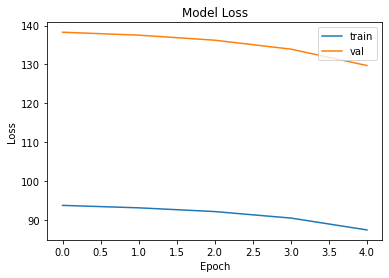

Epoch 1/8                                                                       

15/15 [==============================] - 1s 16ms/step - loss: 94.0921 - mse: 31330.8379 - val_loss: 138.7859 - val_mse: 70685.6641

Epoch 2/8                                                                       

15/15 [==============================] - 0s 5ms/step - loss: 93.6947 - mse: 31192.9766 - val_loss: 138.3081 - val_mse: 70390.5938

Epoch 3/8                                                                       

15/15 [==============================] - 0s 6ms/step - loss: 93.0914 - mse: 31035.7891 - val_loss: 137.5518 - val_mse: 69964.4688

Epoch 4/8                                                                       

15/15 [==============================] - 0s 7ms/step - loss: 92.0613 - mse: 30692.2695 - val_loss: 136.2561 - val_mse: 69260.7891

Epoch 5/8                                                                       

15/15 [==============================] - 0s 5ms/step - loss: 90.3

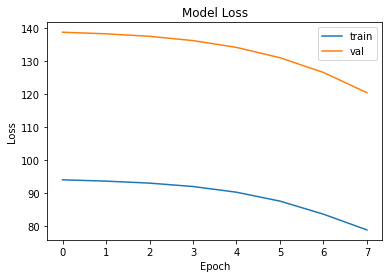

Epoch 1/7                                                                       

13/13 [==============================] - 1s 16ms/step - loss: 94.0157 - mse: 31274.3203 - val_loss: 138.6602 - val_mse: 70466.0625

Epoch 2/7                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 93.6201 - mse: 31093.4883 - val_loss: 138.1735 - val_mse: 70099.5547

Epoch 3/7                                                                       

13/13 [==============================] - 0s 6ms/step - loss: 93.0211 - mse: 30869.6699 - val_loss: 137.3575 - val_mse: 69511.0859

Epoch 4/7                                                                       

13/13 [==============================] - 0s 4ms/step - loss: 91.9111 - mse: 30386.0391 - val_loss: 135.8965 - val_mse: 68518.2656

Epoch 5/7                                                                       

13/13 [==============================] - 0s 5ms/step - loss: 89.9

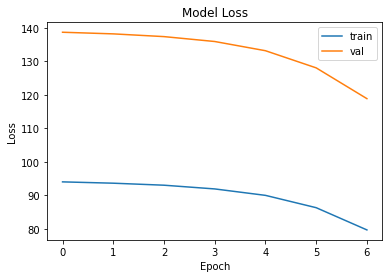

Epoch 1/5                                                                       

12/12 [==============================] - 0s 17ms/step - loss: 94.2015 - mse: 31359.7520 - val_loss: 138.8722 - val_mse: 70786.7344

Epoch 2/5                                                                       

12/12 [==============================] - 0s 6ms/step - loss: 93.8430 - mse: 31298.0820 - val_loss: 138.5650 - val_mse: 70714.0469

Epoch 3/5                                                                       

12/12 [==============================] - 0s 5ms/step - loss: 93.4286 - mse: 31226.6797 - val_loss: 138.1323 - val_mse: 70614.0391

Epoch 4/5                                                                       

12/12 [==============================] - 0s 5ms/step - loss: 92.7474 - mse: 31115.2129 - val_loss: 137.2894 - val_mse: 70428.6328

Epoch 5/5                                                                       

12/12 [==============================] - 0s 5ms/step - loss: 91.0

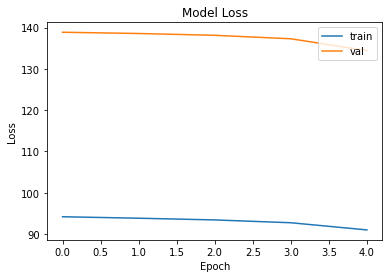

100%|██████████| 10/10 [00:11<00:00,  1.20s/trial, best loss: 19.593509674072266]


In [32]:
best_run1, best_model1 = optim.minimize(model= rg_model_hub,
                                        data=load_rg_data,
                                        algo=tpe.suggest,
                                        max_evals=10,
                                        trials=Trials(),
                                        notebook_name='Code_hw3')
                                     

In [33]:
print("Evalutation of best performing model:")
print(best_model1.evaluate(test_d2,tar_d2))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
1/1 [==============================] - 0s 16ms/step - loss: 19.2698 - mse: 672.6489
[19.269817352294922, 672.64892578125]
Best performing model chosen hyper-parameters:
{'batch_size': 0, 'epochs': 1, 'optimizer': 0}


## Model for Cross Entropy loss for classification

In [12]:
def cl_model_cross(train_x,train_y,vali_x,vali_y,test_d1,tar_d1):
    model = tf.keras.Sequential([
        keras.layers.Dense(64,activation='relu', input_dim=7),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(30,activation='softmax')
    ])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer={{choice(['adam','sgd'])}},metrics=['accuracy'])
    
    history = model.fit(train_x,train_y, epochs={{choice([10,15,20])}}, validation_data=[vali_x,vali_y], batch_size={{choice([10,20,30])}}, verbose=1)
    
# plot graph of train and val loss vs epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()  

    score, accuracy = model.evaluate(test_d1,tar_d1, verbose=1)
  # plot graph of train and val accuracy vs epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()   
    
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}  

>>> Imports:
#coding=utf-8

try:
    import os
except:
    pass

try:
    import random
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import keras
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.regularizers import l2
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'optimizer': hp.choice('optimizer', ['adam','sgd']),
        'epochs': hp.choice('epochs', [10,15,20]),
        'batch_size':

301/301 [==============================] - 1s 2ms/step - loss: 1.9832 - accuracy: 0.2601 - val_loss: 1.9521 - val_accuracy: 0.2939

Epoch 5/15                                           

301/301 [==============================] - 1s 2ms/step - loss: 1.9706 - accuracy: 0.2697 - val_loss: 1.9189 - val_accuracy: 0.3032

Epoch 6/15                                           

301/301 [==============================] - 1s 2ms/step - loss: 1.9536 - accuracy: 0.2764 - val_loss: 1.9658 - val_accuracy: 0.2766

Epoch 7/15                                           

301/301 [==============================] - 1s 2ms/step - loss: 1.9515 - accuracy: 0.2597 - val_loss: 1.9429 - val_accuracy: 0.2846

Epoch 8/15                                           

301/301 [==============================] - 1s 2ms/step - loss: 1.9374 - accuracy: 0.2720 - val_loss: 1.9468 - val_accuracy: 0.3045

Epoch 9/15                                           

301/301 [==============================] - 1s 2ms/step - loss: 1.

301/301 [==============================] - 1s 2ms/step - loss: 1.9117 - accuracy: 0.2747 - val_loss: 1.9081 - val_accuracy: 0.2992

Epoch 13/15                                          

301/301 [==============================] - 1s 2ms/step - loss: 1.9129 - accuracy: 0.2860 - val_loss: 1.9168 - val_accuracy: 0.2726

Epoch 14/15                                          

301/301 [==============================] - 1s 2ms/step - loss: 1.9059 - accuracy: 0.2817 - val_loss: 1.9404 - val_accuracy: 0.3019

Epoch 15/15                                          

301/301 [==============================] - 1s 2ms/step - loss: 1.9017 - accuracy: 0.2803 - val_loss: 1.9160 - val_accuracy: 0.2912

  0%|          | 0/5 [00:11<?, ?trial/s, best loss=?]

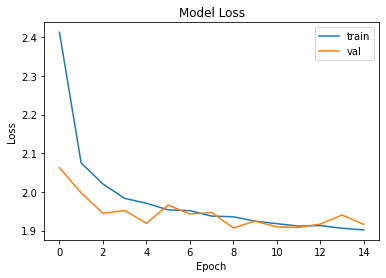

14/14 [==============================] - 0s 2ms/step - loss: 2.0132 - accuracy: 0.2560

  0%|          | 0/5 [00:11<?, ?trial/s, best loss=?]

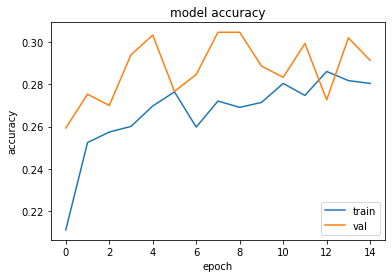

Epoch 1/20                                                                       

151/151 [==============================] - 1s 3ms/step - loss: 2.6252 - accuracy: 0.2142 - val_loss: 2.1712 - val_accuracy: 0.2394

Epoch 2/20                                                                       

151/151 [==============================] - 0s 2ms/step - loss: 2.1413 - accuracy: 0.2434 - val_loss: 2.0414 - val_accuracy: 0.2620

Epoch 3/20                                                                       

151/151 [==============================] - 0s 2ms/step - loss: 2.0603 - accuracy: 0.2488 - val_loss: 1.9983 - val_accuracy: 0.2686

Epoch 4/20                                                                       

151/151 [==============================] - 0s 2ms/step - loss: 2.0092 - accuracy: 0.2627 - val_loss: 1.9855 - val_accuracy: 0.2912

Epoch 5/20                                                                       

151/151 [==============================] - 0s 2ms/step - 

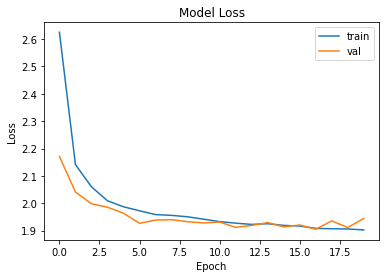

14/14 [==============================] - 0s 2ms/step - loss: 2.0586 - accuracy: 0.2679

 20%|██        | 1/5 [00:19<00:45, 11.43s/trial, best loss: -0.25598084926605225]

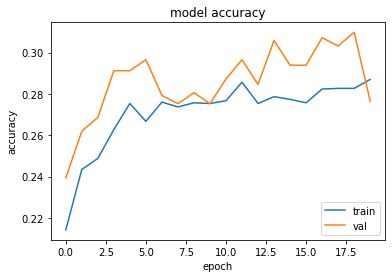

Epoch 1/20                                                                       

101/101 [==============================] - 1s 4ms/step - loss: 3.3060 - accuracy: 0.1407 - val_loss: 3.1840 - val_accuracy: 0.2021

Epoch 2/20                                                                      

101/101 [==============================] - 0s 3ms/step - loss: 3.0827 - accuracy: 0.1999 - val_loss: 2.9312 - val_accuracy: 0.2048

Epoch 3/20                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.8387 - accuracy: 0.2105 - val_loss: 2.6842 - val_accuracy: 0.2088

Epoch 4/20                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.6393 - accuracy: 0.2241 - val_loss: 2.5183 - val_accuracy: 0.2301

Epoch 5/20                                                                      

101/101 [==============================] - 0s 2ms/step - loss

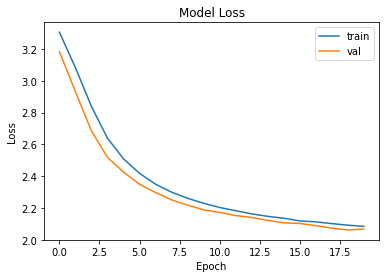

14/14 [==============================] - 0s 2ms/step - loss: 2.1630 - accuracy: 0.2679

 40%|████      | 2/5 [00:25<00:28,  9.36s/trial, best loss: -0.2679425776004791]

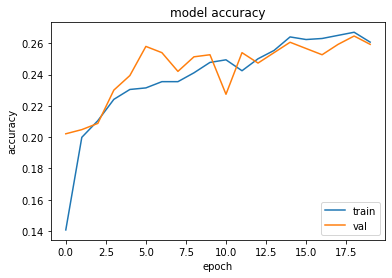

Epoch 1/15                                                                      

151/151 [==============================] - 1s 4ms/step - loss: 3.2526 - accuracy: 0.1922 - val_loss: 3.0586 - val_accuracy: 0.2207

Epoch 2/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss: 2.8709 - accuracy: 0.2069 - val_loss: 2.6377 - val_accuracy: 0.2061

Epoch 3/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss: 2.5532 - accuracy: 0.2155 - val_loss: 2.4040 - val_accuracy: 0.2301

Epoch 4/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss: 2.3994 - accuracy: 0.2401 - val_loss: 2.3085 - val_accuracy: 0.2420

Epoch 5/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss:

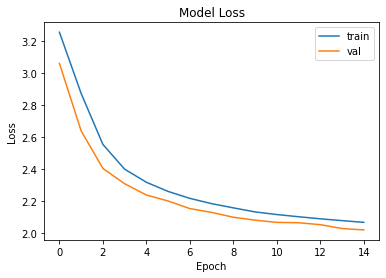

14/14 [==============================] - 0s 2ms/step - loss: 2.1277 - accuracy: 0.2368

 60%|██████    | 3/5 [00:31<00:15,  7.82s/trial, best loss: -0.2679425776004791]

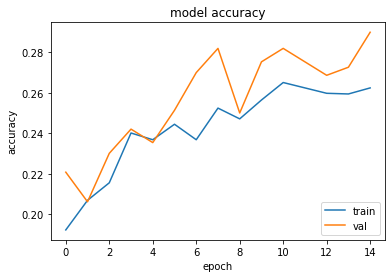

Epoch 1/10                                                                      

101/101 [==============================] - 1s 4ms/step - loss: 3.3084 - accuracy: 0.1024 - val_loss: 3.1986 - val_accuracy: 0.1556

Epoch 2/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 3.1007 - accuracy: 0.1869 - val_loss: 2.9357 - val_accuracy: 0.2407

Epoch 3/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.8280 - accuracy: 0.2172 - val_loss: 2.6496 - val_accuracy: 0.2394

Epoch 4/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.6139 - accuracy: 0.2301 - val_loss: 2.4767 - val_accuracy: 0.2513

Epoch 5/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss:

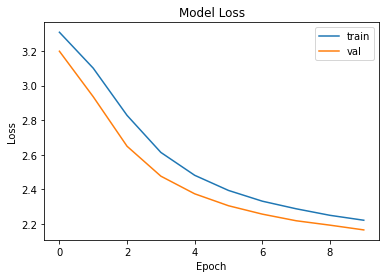

14/14 [==============================] - 0s 2ms/step - loss: 2.2539 - accuracy: 0.2201

 80%|████████  | 4/5 [00:34<00:07,  7.08s/trial, best loss: -0.2679425776004791]

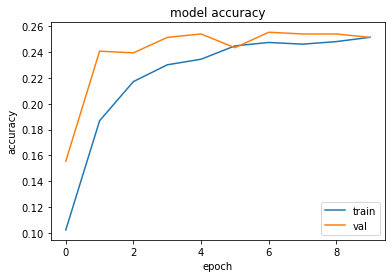

100%|██████████| 5/5 [00:34<00:00,  6.88s/trial, best loss: -0.2679425776004791]


In [13]:
best_run2, best_model2 = optim.minimize(model=cl_model_cross,
                                        data=load_cl_data,
                                        algo=tpe.suggest,
                                        max_evals=5,
                                        trials=Trials(),
                                        notebook_name='Code_hw3')
                                      
                                      
                                      

In [14]:
print("Evalutation of best performing model:")
print(best_model2.evaluate(test_d1,tar_d1))
print("Best performing model chosen hyper-parameters:")
print(best_run2)

Evalutation of best performing model:
14/14 [==============================] - 0s 2ms/step - loss: 2.0586 - accuracy: 0.2679
[2.0585880279541016, 0.2679425776004791]
Best performing model chosen hyper-parameters:
{'batch_size': 1, 'epochs': 2, 'optimizer': 0}


## Model for KL loss for classification

In [15]:
def cl_model_kl(train_x,train_y,vali_x,vali_y,test_d1,tar_d1):
    model = tf.keras.Sequential([
        keras.layers.Dense(64,activation='relu', input_dim=7),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(30,activation='softmax')
    ])
    model.compile(loss=tf.keras.losses.KLDivergence(),optimizer={{choice(['adam','sgd'])}},metrics=['accuracy'])    
    history = model.fit(train_x,train_y, epochs={{choice([10,15,20])}}, validation_data=[vali_x,vali_y], batch_size={{choice([10,20,30,40])}}, verbose=1)
    
# plot graph of train and val loss vs epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()  
    score, accuracy = model.evaluate(test_d2,tar_d12,verbose=1)

  # plot graph of train and val accuracy vs epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()   
    
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}  


>>> Imports:
#coding=utf-8

try:
    import os
except:
    pass

try:
    import random
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import keras
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.regularizers import l2
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'optimizer': hp.choice('optimizer', ['adam','sgd']),
        'epochs': hp.choice('epochs', [10,15,20]),
        'batch_size':

301/301 [==============================] - 1s 5ms/step - loss: 1.9244 - accuracy: 0.2803 - val_loss: 1.9052 - val_accuracy: 0.2939

Epoch 11/15                                          

301/301 [==============================] - 1s 3ms/step - loss: 1.9237 - accuracy: 0.2734 - val_loss: 1.9469 - val_accuracy: 0.2766

Epoch 12/15                                          

301/301 [==============================] - 1s 3ms/step - loss: 1.9210 - accuracy: 0.2717 - val_loss: 1.9244 - val_accuracy: 0.2793

Epoch 13/15                                          

301/301 [==============================] - 1s 3ms/step - loss: 1.9150 - accuracy: 0.2704 - val_loss: 1.9197 - val_accuracy: 0.2992

Epoch 14/15                                          

301/301 [==============================] - 1s 3ms/step - loss: 1.9127 - accuracy: 0.2800 - val_loss: 1.9170 - val_accuracy: 0.2819

Epoch 15/15                                          

301/301 [==============================] - 1s 3ms/step - loss: 1.

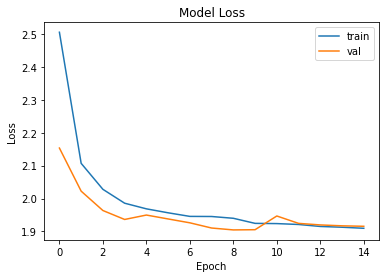

14/14 [==============================] - 0s 2ms/step - loss: 2.0296 - accuracy: 0.2823

  0%|          | 0/5 [00:13<?, ?trial/s, best loss=?]

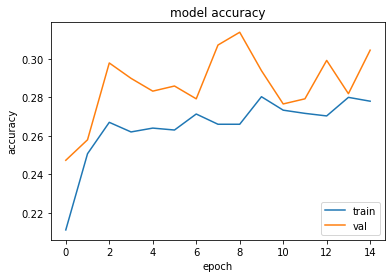

Epoch 1/20                                                                       

151/151 [==============================] - 1s 4ms/step - loss: 2.7060 - accuracy: 0.1876 - val_loss: 2.1630 - val_accuracy: 0.2580

Epoch 2/20                                                                       

151/151 [==============================] - 0s 3ms/step - loss: 2.1341 - accuracy: 0.2378 - val_loss: 2.0535 - val_accuracy: 0.2633

Epoch 3/20                                                                       

151/151 [==============================] - 0s 2ms/step - loss: 2.0442 - accuracy: 0.2607 - val_loss: 1.9858 - val_accuracy: 0.2739

Epoch 4/20                                                                       

151/151 [==============================] - 0s 2ms/step - loss: 1.9977 - accuracy: 0.2611 - val_loss: 1.9541 - val_accuracy: 0.2580

Epoch 5/20                                                                       

151/151 [==============================] - 0s 2ms/step - 

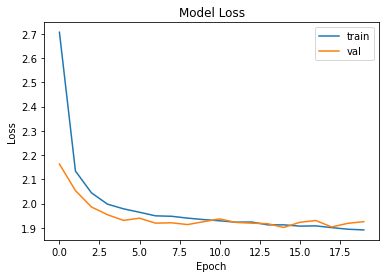

14/14 [==============================] - 0s 2ms/step - loss: 2.0309 - accuracy: 0.2847

 20%|██        | 1/5 [00:22<00:54, 13.74s/trial, best loss: -0.28229665756225586]

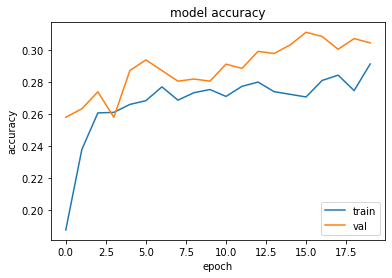

Epoch 1/20                                                                       

101/101 [==============================] - 1s 4ms/step - loss: 3.2890 - accuracy: 0.1230 - val_loss: 3.1558 - val_accuracy: 0.1769

Epoch 2/20                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.9965 - accuracy: 0.1866 - val_loss: 2.8471 - val_accuracy: 0.1795

Epoch 3/20                                                                      

101/101 [==============================] - 0s 3ms/step - loss: 2.7019 - accuracy: 0.1975 - val_loss: 2.5682 - val_accuracy: 0.2221

Epoch 4/20                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.5128 - accuracy: 0.2241 - val_loss: 2.4247 - val_accuracy: 0.2274

Epoch 5/20                                                                      

101/101 [==============================] - 0s 2ms/step - loss

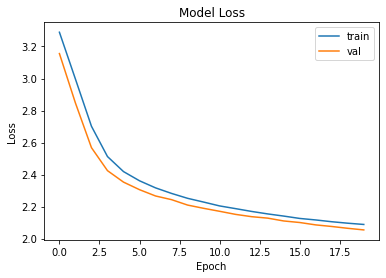

14/14 [==============================] - 0s 2ms/step - loss: 2.1259 - accuracy: 0.2440

 40%|████      | 2/5 [00:27<00:31, 10.56s/trial, best loss: -0.2846890091896057]

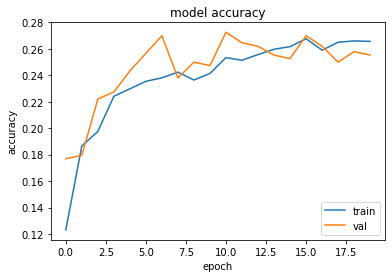

Epoch 1/15                                                                      

151/151 [==============================] - 1s 3ms/step - loss: 3.2557 - accuracy: 0.1640 - val_loss: 3.0828 - val_accuracy: 0.1782

Epoch 2/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss: 2.9003 - accuracy: 0.1792 - val_loss: 2.6889 - val_accuracy: 0.1769

Epoch 3/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss: 2.5849 - accuracy: 0.1876 - val_loss: 2.4414 - val_accuracy: 0.2274

Epoch 4/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss: 2.4209 - accuracy: 0.2205 - val_loss: 2.3238 - val_accuracy: 0.2434

Epoch 5/15                                                                      

151/151 [==============================] - 0s 2ms/step - loss:

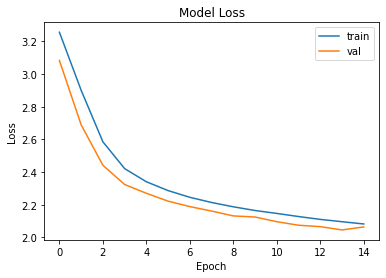

14/14 [==============================] - 0s 2ms/step - loss: 2.1179 - accuracy: 0.2632

 60%|██████    | 3/5 [00:33<00:16,  8.40s/trial, best loss: -0.2846890091896057]

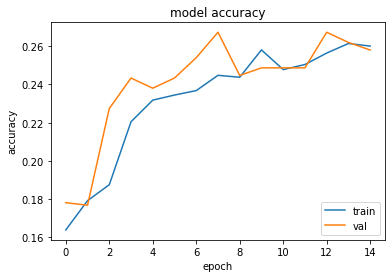

Epoch 1/10                                                                      

101/101 [==============================] - 1s 4ms/step - loss: 3.2507 - accuracy: 0.0991 - val_loss: 3.1088 - val_accuracy: 0.1955

Epoch 2/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.9649 - accuracy: 0.1763 - val_loss: 2.7970 - val_accuracy: 0.2061

Epoch 3/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.6713 - accuracy: 0.1982 - val_loss: 2.5359 - val_accuracy: 0.2354

Epoch 4/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss: 2.4905 - accuracy: 0.2275 - val_loss: 2.4043 - val_accuracy: 0.2394

Epoch 5/10                                                                      

101/101 [==============================] - 0s 2ms/step - loss:

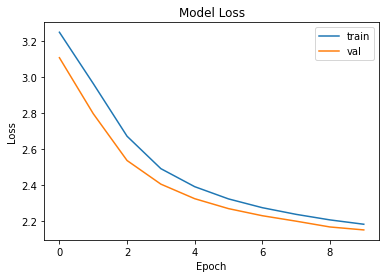

14/14 [==============================] - 0s 3ms/step - loss: 2.2351 - accuracy: 0.2321

 80%|████████  | 4/5 [00:37<00:07,  7.40s/trial, best loss: -0.2846890091896057]

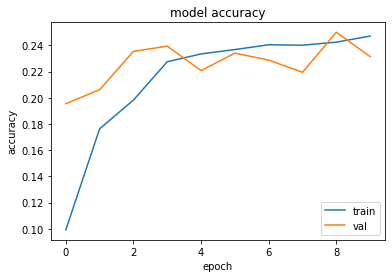

100%|██████████| 5/5 [00:37<00:00,  7.45s/trial, best loss: -0.2846890091896057]


In [16]:
best_run3, best_model3 = optim.minimize(model=cl_model_cross,
                                        data=load_cl_data,
                                        algo=tpe.suggest,
                                        max_evals=5,
                                        trials=Trials(),
                                        notebook_name='Code_hw3')                                                                  
                                                                 

In [17]:
print("Evalutation of best performing model:")
print(best_model3.evaluate(test_d1,tar_d1))
print("Best performing model chosen hyper-parameters:")
print(best_run3)

Evalutation of best performing model:
14/14 [==============================] - 0s 3ms/step - loss: 2.0309 - accuracy: 0.2847
[2.0309011936187744, 0.2846890091896057]
Best performing model chosen hyper-parameters:
{'batch_size': 1, 'epochs': 2, 'optimizer': 0}


# Saving weigts of models using model.save_weights("filename.h5")

In [18]:
best_model.save_weights("MSE_Reg.h5")
best_model1.save_weights("Huber_Reg.h5")
best_model2.save_weights("CrossEn_Class.h5")
best_model3.save_weights("KL_Class.h5")

In [19]:
def train_test_d1():
    dataset_1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None)
    # For dataset 1 I will drop the first column, the M/F as we don't need it 
    data_1 = dataset_1
    data1 = data_1.drop(data_1.columns[[0]],axis=1) 
    label_d1 = data1.iloc[:,7:]
    data_d1 = data1.iloc[:,:7]
    #normalize if by subtracting mean and dividing by standard devidation 
    mean_d1 = data_d1.mean(axis=0)
    data_d1 -= mean_d1
    std_d1 = data_d1.std()
    data_d1 /= std_d1
    # one hot encoding
    label_d1 = to_categorical(label_d1)
    # splitiing dataset1 into train and test: DATASET1
    X_d1,test_d1,Y_d1,tar_d1 = train_test_split(data_d1,label_d1,test_size=0.1, random_state=69)
    return X_d1,test_d1,Y_d1,tar_d1

In [20]:
X_d1,test_d1,Y_d1,tar_d1 = train_test_d1()

In [21]:
def train_test_d2():
    dataset_2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data", header=None)
    # For dataset 2 I will drop the first two columns as they are non predictive  
    data_2 = dataset_2
    data2 = data_2.drop(data_2.columns[[0,1]],axis=1)
    data_d2 = data2.iloc[:,:7]
    label_d2 = data2.iloc[:,7:]
    #for 2nd dataset
    mean_d2 = data_d2.mean(axis=0)
    data_d2 -= mean_d2
    std_d2 = data_d2.std()
    data_d2 /= std_d2  
    # splitiing dataset1 into train and test: DATASET2    
    X_d2,test_d2,Y_d2,tar_d2 = train_test_split(data_d2,label_d2,test_size=0.08)
    return X_d2,test_d2,Y_d2,tar_d2

In [22]:
X_d2,test_d2,Y_d2,tar_d2 = train_test_d2()

# Final performances of the above models, fitting with entire train dataset and evaluating with test dataset

In [23]:
best_model.fit(X_d2,Y_d2,verbose=0)
print(best_model.evaluate(test_d2,tar_d2))
best_model1.fit(X_d2,Y_d2,verbose=0)
print(best_model1.evaluate(test_d2,tar_d2))
best_model2.fit(X_d1,Y_d1,verbose=0)
print(best_model2.evaluate(test_d1,tar_d1))
best_model3.fit(X_d1,Y_d1,verbose=0)
print(best_model3.evaluate(test_d1,tar_d1))

1/1 [==============================] - 0s 23ms/step - loss: 1084.0194 - mse: 1084.0194
[1084.0194091796875, 1084.0194091796875]
1/1 [==============================] - 0s 21ms/step - loss: 31.3728 - mse: 5497.9072
[31.372831344604492, 5497.9072265625]
14/14 [==============================] - 0s 2ms/step - loss: 2.0189 - accuracy: 0.2512
[2.01889705657959, 0.2511961758136749]
14/14 [==============================] - 0s 3ms/step - loss: 2.0128 - accuracy: 0.2703
[2.012828826904297, 0.270334929227829]


## Regulazied models which will be overfitted to report results
overfit model, apply regularization methods and access the performance


In [24]:
def rg_mse_regu(X_d2,test_d2,Y_d2,tar_d2):
    model = tf.keras.Sequential([
        keras.layers.Dense(8,activation='relu', input_dim=7),
        keras.layers.Dense(14,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dense(32,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(1,activation='linear')
    ])
    model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam',metrics=['mse'])
    history = model.fit(X_d2,Y_d2, epochs=50,batch_size=10, verbose=2)
    print(model.evaluate(test_d2,tar_d2))

    return 0

In [25]:
from keras.regularizers import l2
rg_mse_regu(X_d2,test_d2,Y_d2,tar_d2)

Epoch 1/50
20/20 - 0s - loss: 34788.2734 - mse: 34787.9688 - 421ms/epoch - 21ms/step
Epoch 2/50
20/20 - 0s - loss: 34577.0352 - mse: 34576.7422 - 48ms/epoch - 2ms/step
Epoch 3/50
20/20 - 0s - loss: 34353.9336 - mse: 34353.6406 - 40ms/epoch - 2ms/step
Epoch 4/50
20/20 - 0s - loss: 34024.1406 - mse: 34023.8477 - 39ms/epoch - 2ms/step
Epoch 5/50
20/20 - 0s - loss: 33262.0898 - mse: 33261.7930 - 42ms/epoch - 2ms/step
Epoch 6/50
20/20 - 0s - loss: 31795.6777 - mse: 31795.3652 - 39ms/epoch - 2ms/step
Epoch 7/50
20/20 - 0s - loss: 29017.4160 - mse: 29017.0918 - 34ms/epoch - 2ms/step
Epoch 8/50
20/20 - 0s - loss: 25369.3828 - mse: 25369.0293 - 47ms/epoch - 2ms/step
Epoch 9/50
20/20 - 0s - loss: 20800.7129 - mse: 20800.3379 - 54ms/epoch - 3ms/step
Epoch 10/50
20/20 - 0s - loss: 12345.2764 - mse: 12344.8740 - 47ms/epoch - 2ms/step
Epoch 11/50
20/20 - 0s - loss: 6807.4253 - mse: 6807.0132 - 38ms/epoch - 2ms/step
Epoch 12/50
20/20 - 0s - loss: 3268.3574 - mse: 3267.9336 - 48ms/epoch - 2ms/step
Epo

0

In [26]:
def rg_hub_regu(X_d2,test_d2,Y_d2,tar_d2):
    model = tf.keras.Sequential([
        keras.layers.Dense(8,activation='relu', input_dim=7),
        keras.layers.Dense(14,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dense(32,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation='relu'),        
        keras.layers.Dense(1,activation='linear')
    ])
    model.compile(loss=tf.keras.losses.Huber(),optimizer='sgd',metrics=['mse'])
    
    history = model.fit(X_d2,Y_d2, epochs=50,batch_size=14, verbose=2)
    print(model.evaluate(test_d2,tar_d2))

    return 0

In [27]:
rg_hub_regu(X_d2,test_d2,Y_d2,tar_d2)

Epoch 1/50
14/14 - 1s - loss: 98.2915 - mse: 34588.2695 - 606ms/epoch - 43ms/step
Epoch 2/50
14/14 - 0s - loss: 97.4066 - mse: 34316.0664 - 40ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 94.9261 - mse: 33808.6289 - 43ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 80.2463 - mse: 29537.7109 - 53ms/epoch - 4ms/step
Epoch 5/50
14/14 - 0s - loss: 38.8889 - mse: 8113.5181 - 57ms/epoch - 4ms/step
Epoch 6/50
14/14 - 0s - loss: 32.7587 - mse: 5030.0918 - 43ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 31.7568 - mse: 4721.7534 - 47ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 32.0642 - mse: 6886.7788 - 49ms/epoch - 4ms/step
Epoch 9/50
14/14 - 0s - loss: 29.9160 - mse: 6062.9590 - 60ms/epoch - 4ms/step
Epoch 10/50
14/14 - 0s - loss: 36.1057 - mse: 7184.3848 - 49ms/epoch - 3ms/step
Epoch 11/50
14/14 - 0s - loss: 26.4127 - mse: 3747.3213 - 55ms/epoch - 4ms/step
Epoch 12/50
14/14 - 0s - loss: 26.6909 - mse: 3385.7307 - 50ms/epoch - 4ms/step
Epoch 13/50
14/14 - 0s - loss: 28.1163 - ms

0

In [28]:
def cl_cross_regu(X_d1,test_d1,Y_d1,tar_d1):
    model = tf.keras.Sequential([
        keras.layers.Dense(64,activation='relu', input_dim=7),
        keras.layers.Dense(64,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dense(30,activation='softmax')
    ])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
    
    history = model.fit(X_d1,Y_d1, epochs=50, validation_data=[vali_x,vali_y], batch_size=10, verbose=2)
    print(model.evaluate(test_d1,tar_d1))
    
    return 0

In [29]:
cl_cross_regu(X_d1,test_d1,Y_d1,tar_d1)

Epoch 1/50
376/376 - 1s - loss: 2.9381 - accuracy: 0.2080 - val_loss: 2.3460 - val_accuracy: 0.2726 - 1s/epoch - 3ms/step
Epoch 2/50
376/376 - 1s - loss: 2.3258 - accuracy: 0.2429 - val_loss: 2.1761 - val_accuracy: 0.2699 - 786ms/epoch - 2ms/step
Epoch 3/50
376/376 - 1s - loss: 2.2164 - accuracy: 0.2538 - val_loss: 2.1130 - val_accuracy: 0.2793 - 793ms/epoch - 2ms/step
Epoch 4/50
376/376 - 1s - loss: 2.1624 - accuracy: 0.2572 - val_loss: 2.0569 - val_accuracy: 0.2912 - 834ms/epoch - 2ms/step
Epoch 5/50
376/376 - 1s - loss: 2.1266 - accuracy: 0.2527 - val_loss: 2.0231 - val_accuracy: 0.2886 - 884ms/epoch - 2ms/step
Epoch 6/50
376/376 - 1s - loss: 2.1014 - accuracy: 0.2591 - val_loss: 2.0280 - val_accuracy: 0.2779 - 902ms/epoch - 2ms/step
Epoch 7/50
376/376 - 1s - loss: 2.0833 - accuracy: 0.2642 - val_loss: 1.9974 - val_accuracy: 0.2979 - 782ms/epoch - 2ms/step
Epoch 8/50
376/376 - 1s - loss: 2.0683 - accuracy: 0.2660 - val_loss: 1.9974 - val_accuracy: 0.2806 - 877ms/epoch - 2ms/step
Epo

0

In [30]:
def cl_kl_regu(X_d1,test_d1,Y_d1,tar_d1):
    model = tf.keras.Sequential([
        keras.layers.Dense(64,activation='relu', input_dim=7),
        keras.layers.Dense(64,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,kernel_regularizer=l2(0.01),activation='relu'),
        keras.layers.Dense(30,activation='softmax')
    ])
    model.compile(loss=tf.keras.losses.KLDivergence(),optimizer='adam',metrics=['accuracy'])    
    history = model.fit(train_x,train_y, epochs=50, validation_data=[vali_x,vali_y], batch_size=10, verbose=2)
    print(model.evaluate(test_d1,tar_d1))

    
    return 0


In [31]:
cl_kl_regu(X_d1,test_d1,Y_d1,tar_d1)

Epoch 1/50
301/301 - 1s - loss: 3.0665 - accuracy: 0.1952 - val_loss: 2.4301 - val_accuracy: 0.2460 - 1s/epoch - 4ms/step
Epoch 2/50
301/301 - 1s - loss: 2.3724 - accuracy: 0.2381 - val_loss: 2.2620 - val_accuracy: 0.2434 - 717ms/epoch - 2ms/step
Epoch 3/50
301/301 - 1s - loss: 2.2507 - accuracy: 0.2428 - val_loss: 2.1615 - val_accuracy: 0.2660 - 721ms/epoch - 2ms/step
Epoch 4/50
301/301 - 1s - loss: 2.1883 - accuracy: 0.2531 - val_loss: 2.1263 - val_accuracy: 0.2713 - 712ms/epoch - 2ms/step
Epoch 5/50
301/301 - 1s - loss: 2.1542 - accuracy: 0.2527 - val_loss: 2.0931 - val_accuracy: 0.2832 - 740ms/epoch - 2ms/step
Epoch 6/50
301/301 - 1s - loss: 2.1313 - accuracy: 0.2557 - val_loss: 2.0633 - val_accuracy: 0.2806 - 768ms/epoch - 3ms/step
Epoch 7/50
301/301 - 1s - loss: 2.1149 - accuracy: 0.2667 - val_loss: 2.0547 - val_accuracy: 0.2859 - 720ms/epoch - 2ms/step
Epoch 8/50
301/301 - 1s - loss: 2.0913 - accuracy: 0.2514 - val_loss: 2.0430 - val_accuracy: 0.2673 - 716ms/epoch - 2ms/step
Epo

0